In [157]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data_df = pd.read_csv('train.csv').drop('PassengerId', axis=1)
data_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [164]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [181]:


data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   object 
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Name          6606 non-null   object 
 12  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 677.4+ KB


In [165]:
data_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [166]:
def showplot(df, column_name):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax = ax.flatten()
    value_counts = df[column_name].value_counts()
    labels = value_counts.index.tolist()

    ax[0].pie(value_counts, autopct='%.1f%%', wedgeprops=dict(width=0.8),pctdistance=0.8)
    centre_circle = plt.Circle((0,0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)

    sns.countplot(data=df, y=column_name, ax=ax[1], order=labels, hue='Transported')
    for i, v in enumerate(value_counts):
        ax[1].text(v-200, i, str(v), color='black', fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=12, color='black')
    ax[1].set_ylabel=(None)
    ax[1].legend(loc='lower right', title='Transported')
    plt.xlabel('')
    plt.xticks([])
    fig.suptitle(column_name, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0,0,1,1])
    plt.show()

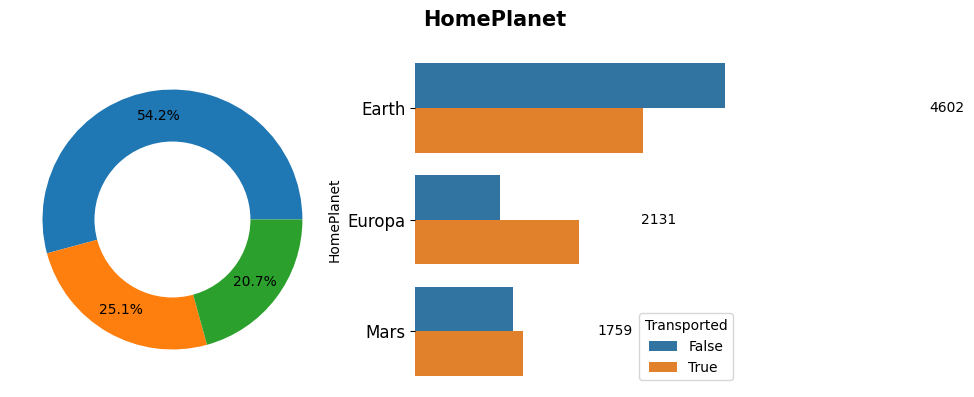

In [167]:
showplot(data_df,"HomePlanet")

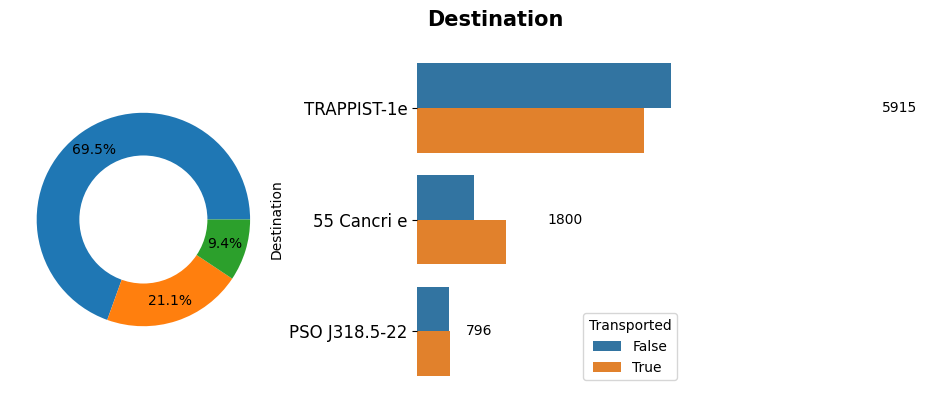

In [168]:
showplot(data_df, 'Destination')

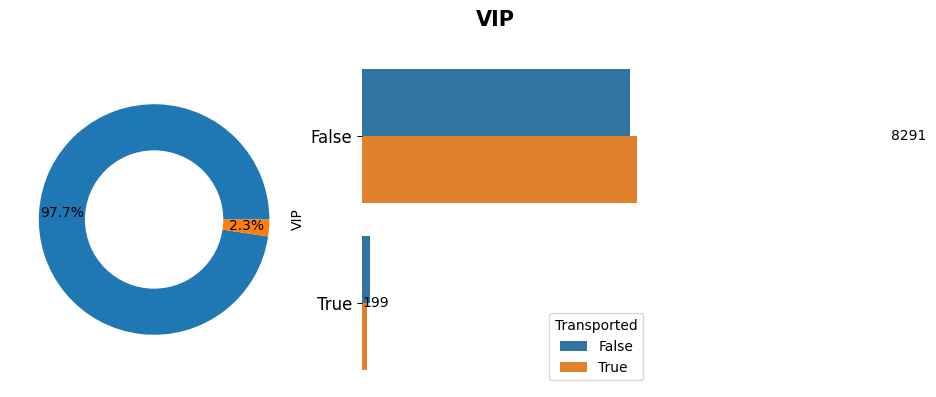

In [169]:
showplot(data_df, 'VIP')

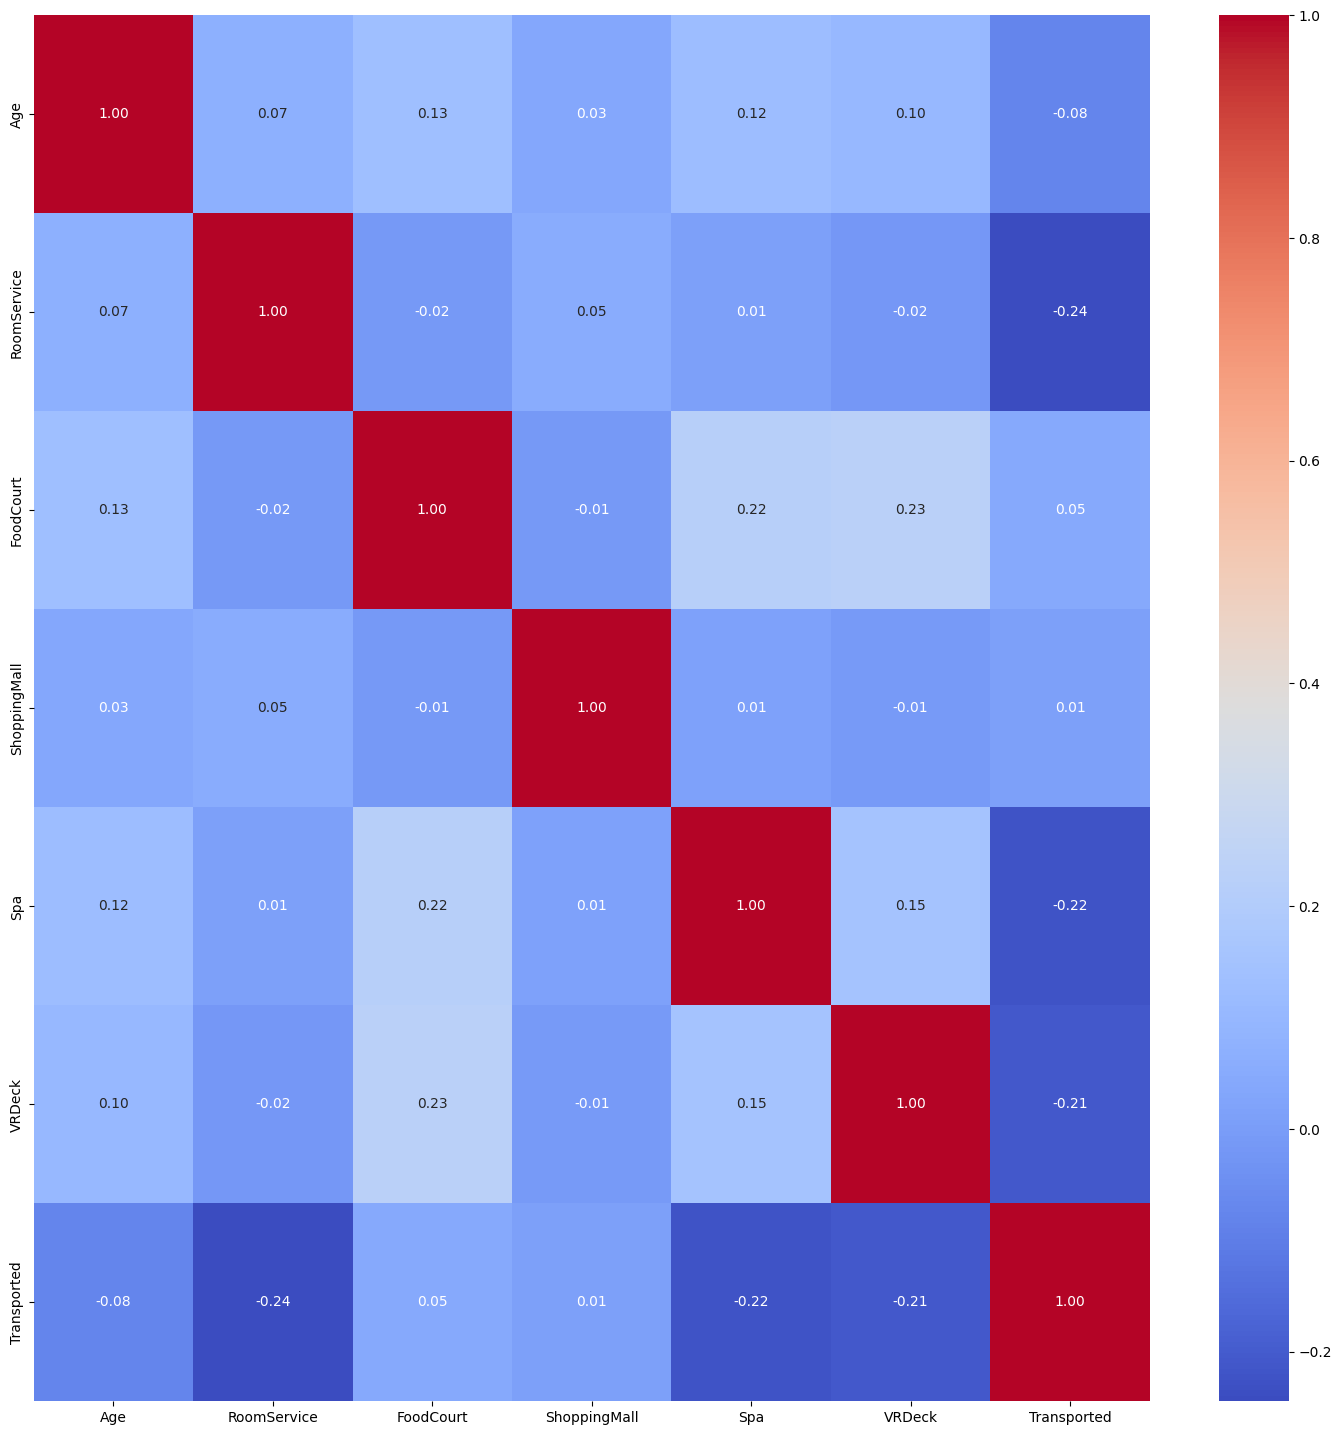

In [170]:
num_df = data_df.select_dtypes(['float64','bool'])
plt.figure(figsize=(18, 18))
sns.heatmap(num_df.corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
mask = abs(num_df.corr()['Transported'])<0.015
weak_relative_num_cols = mask[mask.values].index.tolist()

In [180]:
cat_df = data_df.select_dtypes(['object'])
cat_df.fillna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8492 non-null   object
 1   CryoSleep    8476 non-null   object
 2   Cabin        8494 non-null   object
 3   Destination  8511 non-null   object
 4   VIP          8490 non-null   object
 5   Name         8493 non-null   object
dtypes: object(6)
memory usage: 407.6+ KB


In [177]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])
categorical_transformer.fit(cat_df)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['bool', 'str']

In [161]:
()

()